In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU, Conv1D,Conv2D, Bidirectional, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed, RepeatVector
from keras.optimizers import Adam , SGD , RMSprop
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
#load dataset
df = pd.read_csv('Car_Insurance_Claim.csv')

In [4]:
#check first five rows
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [5]:
#check the shape of the dataset
df.shape

(10000, 19)

In [6]:
#dataset description
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [7]:
#checking datatypes
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [8]:
#checking for null values
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [9]:
df[df['CREDIT_SCORE'].isnull()]

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
17,24851,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,1.0,0.0,32765,12000.0,sedan,0,0,0,1.0
23,217,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,0.0,0.0,10238,17000.0,sedan,0,0,0,0.0
37,511757,40-64,female,majority,10-19y,none,middle class,NaN,1.0,before 2015,1.0,1.0,10238,11000.0,sedan,2,0,1,0.0
38,429947,65+,male,majority,30y+,university,upper class,NaN,0.0,after 2015,0.0,1.0,10238,12000.0,sports car,6,0,5,0.0
47,921097,40-64,female,majority,20-29y,university,upper class,NaN,1.0,after 2015,1.0,1.0,92101,11000.0,sedan,3,0,2,0.0
55,437535,26-39,female,majority,10-19y,high school,middle class,NaN,1.0,after 2015,1.0,0.0,10238,15000.0,sedan,0,0,0,0.0
61,171578,26-39,male,majority,10-19y,university,upper class,NaN,1.0,before 2015,1.0,1.0,10238,8000.0,sedan,2,0,1,0.0
72,422816,40-64,male,majority,20-29y,high school,working class,NaN,1.0,before 2015,0.0,0.0,10238,12000.0,sedan,5,0,7,0.0
73,307408,26-39,female,minority,10-19y,none,working class,NaN,1.0,before 2015,0.0,1.0,10238,9000.0,sedan,2,0,0,0.0
99,55670,26-39,male,majority,10-19y,university,upper class,NaN,1.0,after 2015,1.0,1.0,10238,11000.0,sedan,3,1,0,0.0


In [10]:
df[df['ANNUAL_MILEAGE'].isnull()]

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
13,569640,16-25,female,majority,0-9y,university,upper class,0.591260,1.0,before 2015,0.0,1.0,10238,NaN,sedan,0,0,0,0.0
15,906223,26-39,female,majority,0-9y,high school,upper class,0.762798,0.0,after 2015,1.0,0.0,10238,NaN,sedan,0,0,0,0.0
16,517747,65+,male,majority,30y+,university,upper class,0.796175,1.0,before 2015,1.0,1.0,32765,NaN,sedan,10,2,1,0.0
18,104086,26-39,female,majority,0-9y,university,upper class,0.680594,1.0,before 2015,0.0,1.0,32765,NaN,sedan,0,0,0,1.0
58,123941,40-64,female,majority,20-29y,university,middle class,0.570157,1.0,after 2015,1.0,1.0,10238,NaN,sedan,0,0,0,0.0
64,788111,40-64,female,minority,20-29y,high school,poverty,0.454447,1.0,before 2015,1.0,1.0,10238,NaN,sedan,1,0,1,0.0
65,407453,40-64,female,majority,0-9y,university,upper class,0.613741,1.0,before 2015,0.0,0.0,10238,NaN,sedan,0,0,0,0.0
92,509815,26-39,female,majority,0-9y,high school,working class,0.511457,1.0,after 2015,1.0,1.0,32765,NaN,sedan,0,0,0,0.0
101,814196,16-25,female,majority,0-9y,none,middle class,0.634053,1.0,before 2015,0.0,1.0,32765,NaN,sedan,0,0,0,1.0
102,560160,16-25,female,majority,0-9y,high school,poverty,0.457470,0.0,before 2015,0.0,0.0,10238,NaN,sedan,0,0,0,0.0


In [11]:
### Data Cleaning

In [12]:
df['VEHICLE_OWNERSHIP'] = df['VEHICLE_OWNERSHIP'].astype(int)
df['MARRIED'] = df['MARRIED'].astype(int)
df['CHILDREN'] = df['CHILDREN'].astype(int)


In [13]:
#fill empty records with 0
df = df.fillna(0)

### Exploratory Data Analysis

In [14]:
df['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [15]:
#checking the distribution of the target variable
df['AGE'].value_counts()

26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64

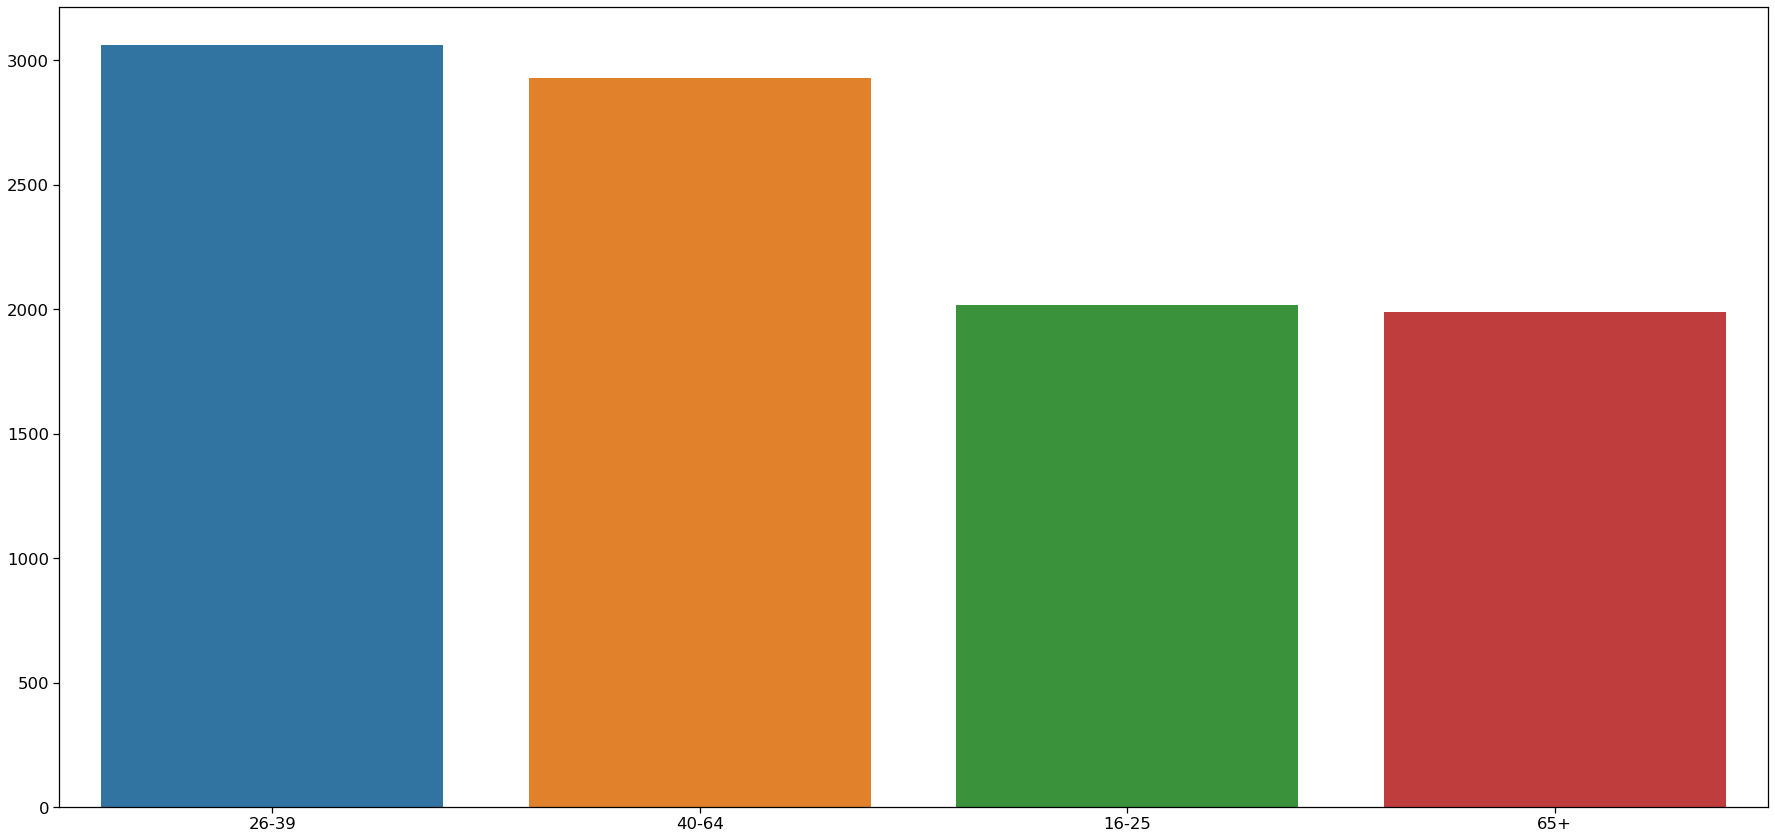

In [16]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.AGE.value_counts()[:10].index,y=df.AGE.value_counts()[:10].values)
plt.tight_layout()

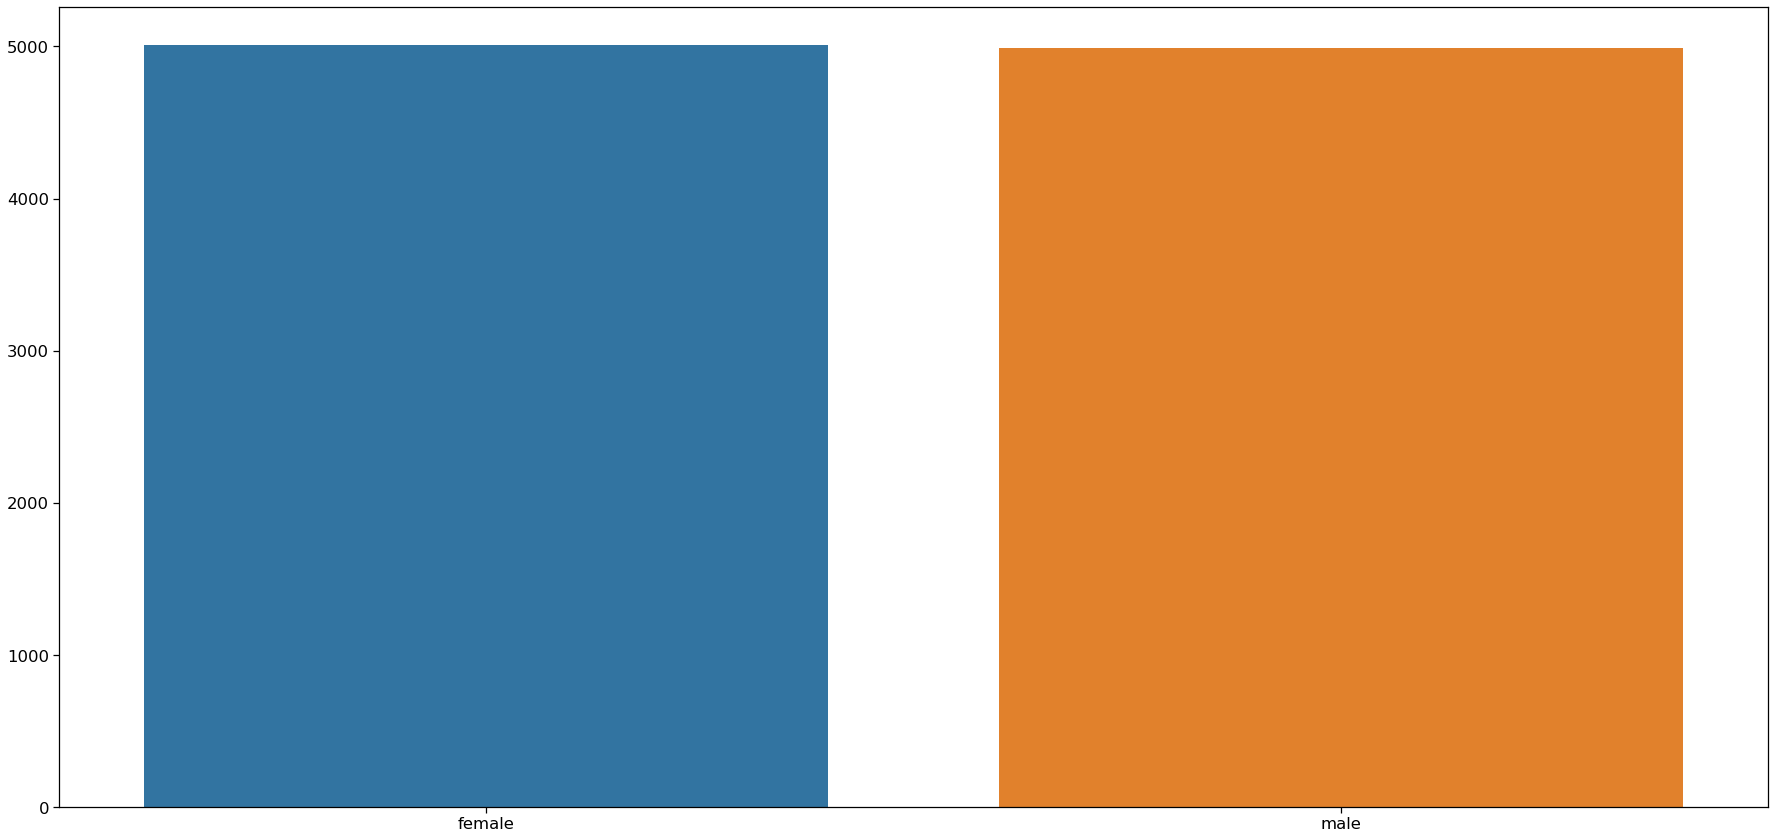

In [17]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.GENDER.value_counts()[:10].index,y=df.GENDER.value_counts()[:10].values)
plt.tight_layout()

Text(0.5, 1.0, 'Race Distribution')

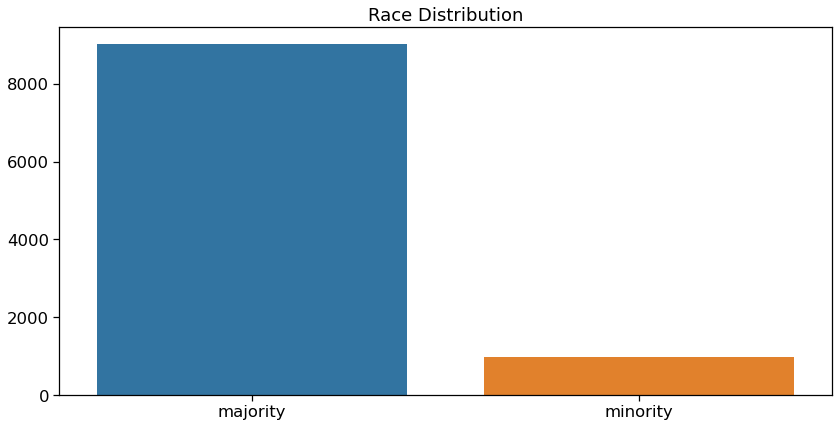

In [18]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.RACE.value_counts()[:10].index,y=df.RACE.value_counts()[:10].values)
plt.tight_layout()
plt.title('Race Distribution')

Text(0.5, 1.0, 'Driving_Experience Distribution')

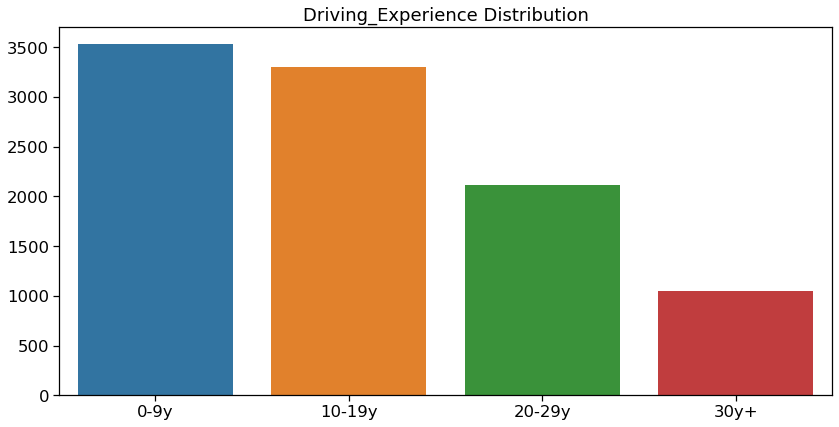

In [19]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.DRIVING_EXPERIENCE.value_counts()[:10].index,y=df.DRIVING_EXPERIENCE.value_counts()[:10].values)
plt.tight_layout()
plt.title('Driving_Experience Distribution')

Text(0.5, 1.0, 'Education Distribution')

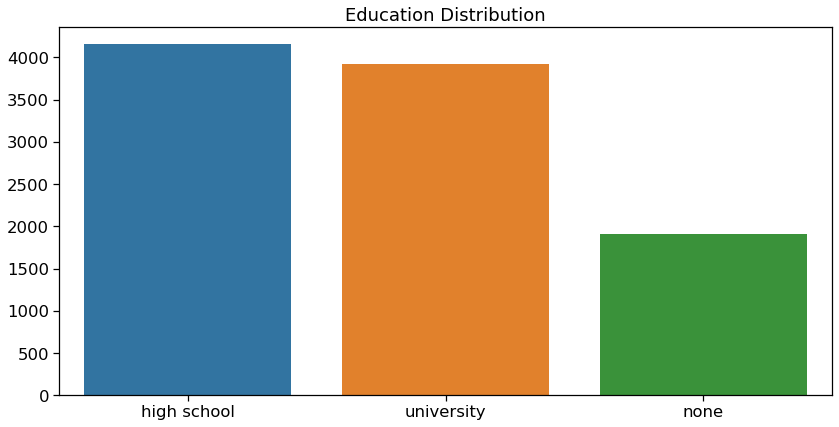

In [20]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.EDUCATION.value_counts()[:10].index,y=df.EDUCATION.value_counts()[:10].values)
plt.tight_layout()
plt.title('Education Distribution')

In [21]:
df.VEHICLE_OWNERSHIP.value_counts()

1    6970
0    3030
Name: VEHICLE_OWNERSHIP, dtype: int64

Text(0.5, 1.0, 'Vehicle Ownership Distribution')

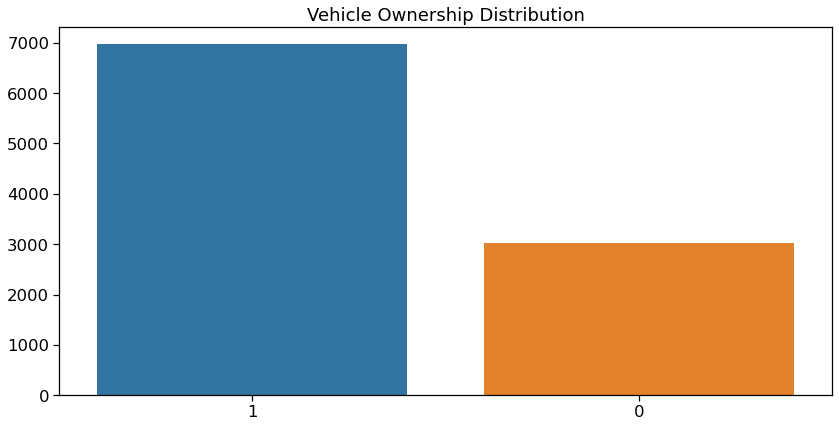

In [22]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.VEHICLE_OWNERSHIP.astype(str).value_counts()[:10].index,y=df.VEHICLE_OWNERSHIP.astype(str).value_counts()[:10].values)
plt.tight_layout()
plt.title('Vehicle Ownership Distribution')

Text(0.5, 1.0, 'Vehicle Year Distribution')

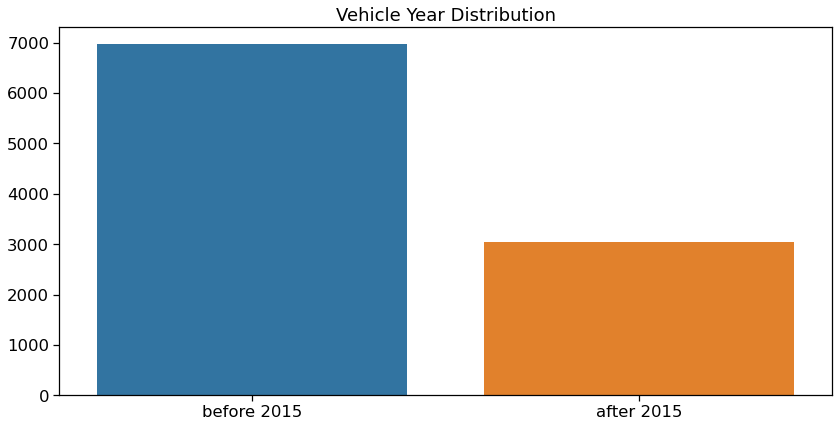

In [23]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.VEHICLE_YEAR.astype(str).value_counts()[:10].index,y=df.VEHICLE_YEAR.astype(str).value_counts()[:10].values)
plt.tight_layout()
plt.title('Vehicle Year Distribution')

Text(0.5, 1.0, 'Married Distribution')

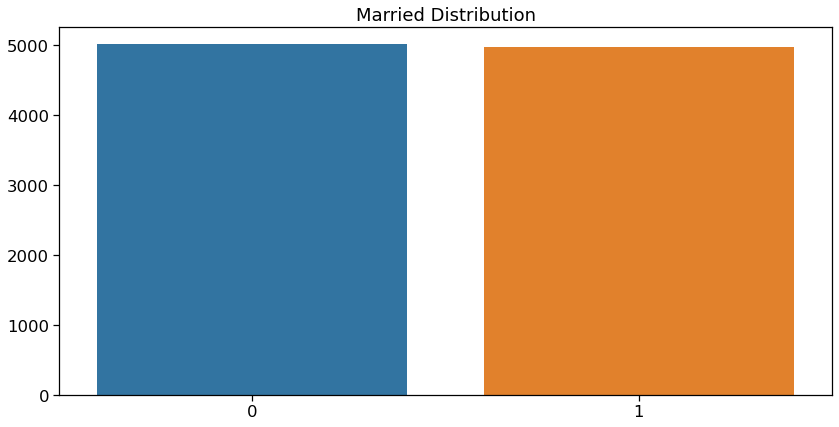

In [24]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.MARRIED.astype(str).value_counts()[:10].index,y=df.MARRIED.astype(str).value_counts()[:10].values)
plt.tight_layout()
plt.title('Married Distribution')

Text(0.5, 1.0, 'Children Distribution')

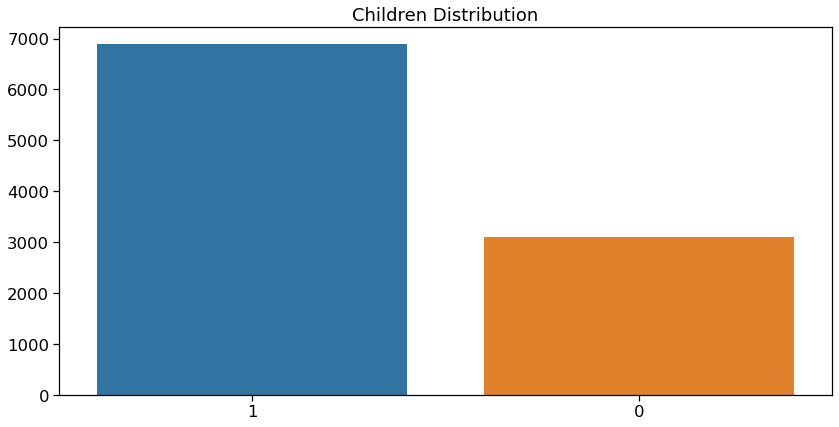

In [25]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.CHILDREN.astype(str).value_counts()[:10].index,y=df.CHILDREN.astype(str).value_counts()[:10].values)
plt.tight_layout()
plt.title('Children Distribution')

Text(0.5, 1.0, 'Postal Code Distribution')

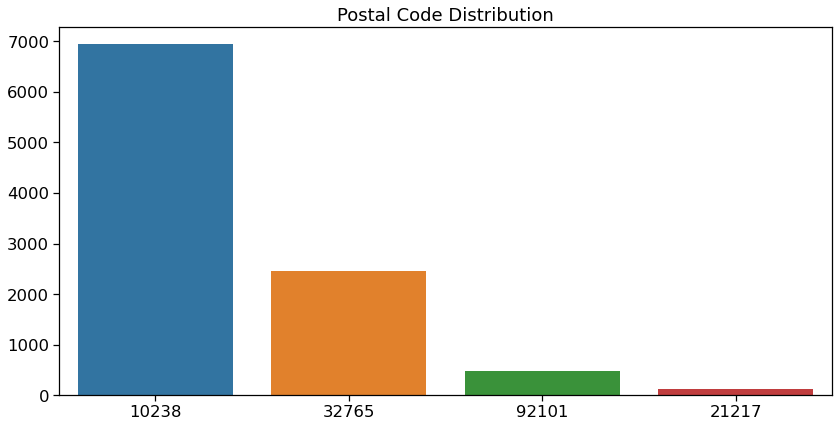

In [26]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.POSTAL_CODE.astype(str).value_counts()[:10].index,y=df.POSTAL_CODE.astype(str).value_counts()[:10].values)
plt.tight_layout()
plt.title('Postal Code Distribution')

Text(0.5, 1.0, 'Vehicle Type Distribution')

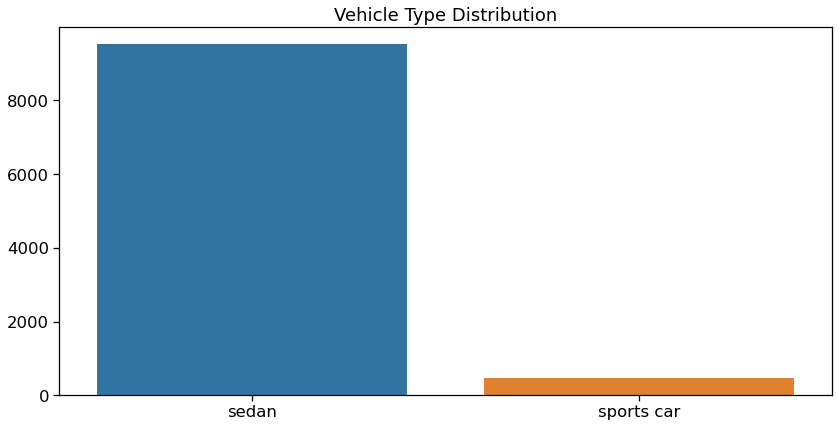

In [27]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.VEHICLE_TYPE.astype(str).value_counts()[:10].index,y=df.VEHICLE_TYPE.astype(str).value_counts()[:10].values)
plt.tight_layout()
plt.title('Vehicle Type Distribution')

Text(0.5, 1.0, 'Speed Violation Distribution')

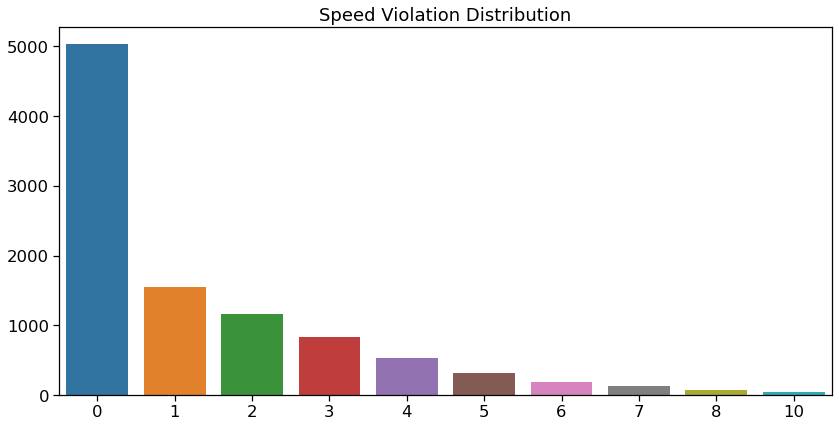

In [28]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.SPEEDING_VIOLATIONS.astype(str).value_counts()[:10].index,y=df.SPEEDING_VIOLATIONS.astype(str).value_counts()[:10].values)
plt.tight_layout()
plt.title('Speed Violation Distribution')

Text(0.5, 1.0, 'DUIS Distribution')

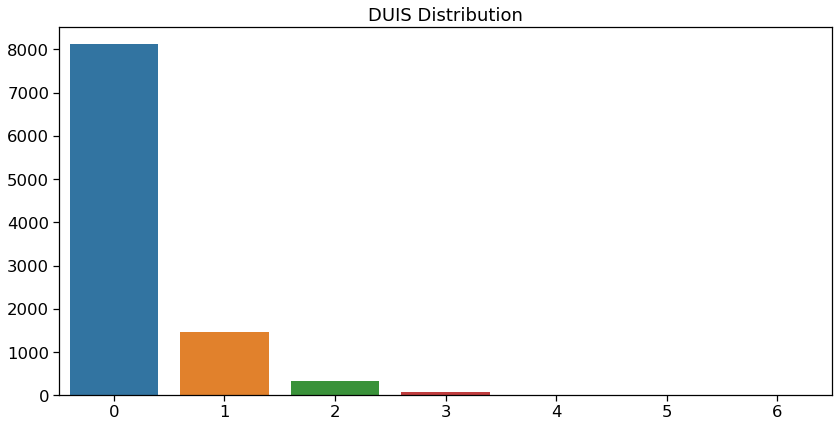

In [29]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.DUIS.astype(str).value_counts()[:10].index,y=df.DUIS.astype(str).value_counts()[:10].values)
plt.tight_layout()
plt.title('DUIS Distribution')

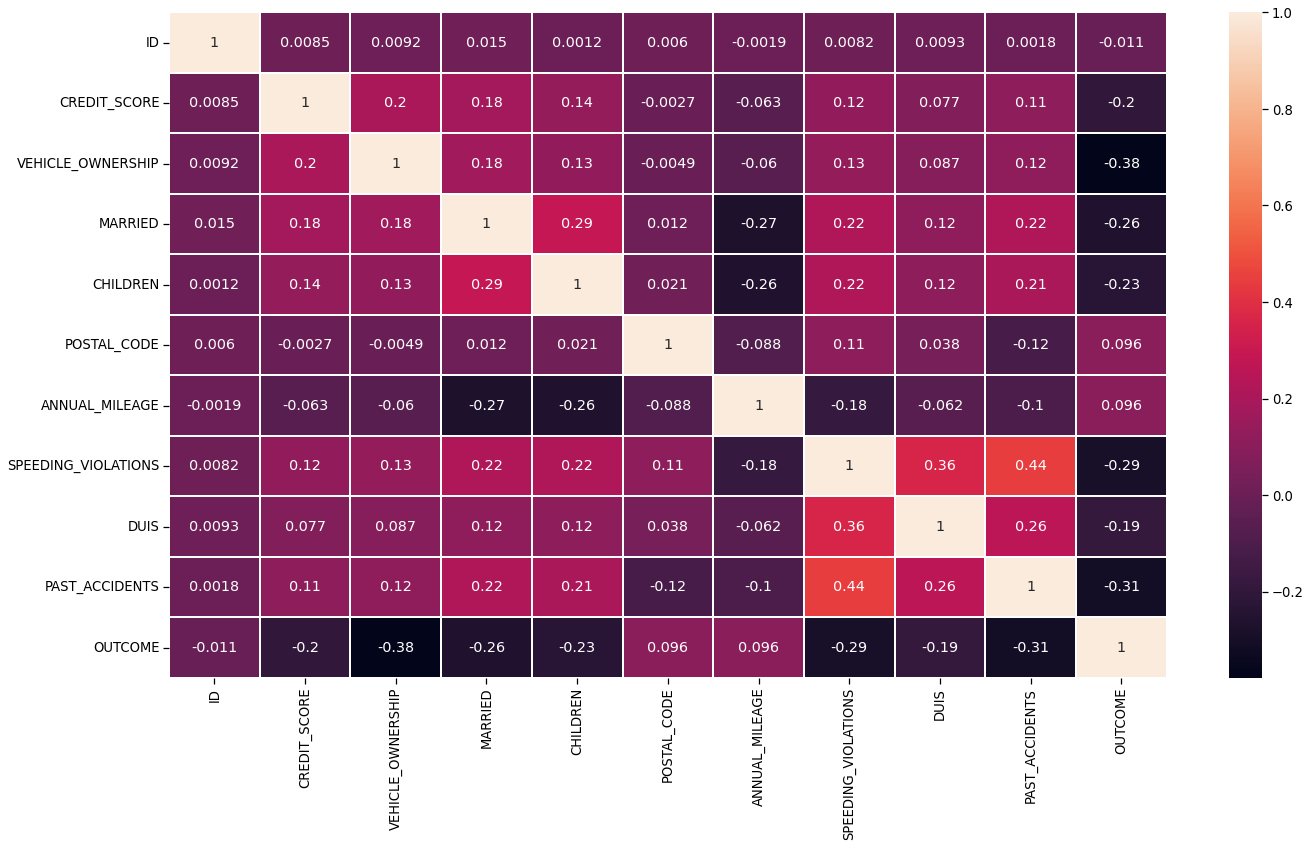

In [30]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale=1.2)
sns.heatmap(df.corr(), annot=True, linewidth = 2)
plt.tight_layout()

In [31]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [32]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1.0


In [33]:
### Feature Engineering


In [34]:
df['CREDIT_SCORE_top'] = df['CREDIT_SCORE'].apply(lambda x: 'low' if x <= 0.49 else 'high')

In [35]:
### Data Preprocessing

In [36]:
OneHot = OneHotEncoder()


In [37]:
df['AGE'] = OneHot.fit_transform(df['AGE'].values.reshape(-1,1)).toarray()
df['GENDER']  = OneHot.fit_transform(df['GENDER'].values.reshape(-1,1)).toarray()
df['RACE']  = OneHot.fit_transform(df['RACE'].values.reshape(-1,1)).toarray()
df['DRIVING_EXPERIENCE']  = OneHot.fit_transform(df['DRIVING_EXPERIENCE'].values.reshape(-1,1)).toarray()
df['EDUCATION']  = OneHot.fit_transform(df['EDUCATION'].values.reshape(-1,1)).toarray()
df['INCOME']  = OneHot.fit_transform(df['INCOME'].values.reshape(-1,1)).toarray()
df['VEHICLE_YEAR']  = OneHot.fit_transform(df['VEHICLE_YEAR'].values.reshape(-1,1)).toarray()
df['VEHICLE_TYPE']  = OneHot.fit_transform(df['VEHICLE_TYPE'].values.reshape(-1,1)).toarray()
df['CREDIT_SCORE_top']  = OneHot.fit_transform(df['CREDIT_SCORE_top'].values.reshape(-1,1)).toarray()

In [38]:
sc = StandardScaler()

df['ANNUAL_MILEAGE']  = sc.fit_transform(df['ANNUAL_MILEAGE'].values.reshape(-1, 1))

In [39]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,CREDIT_SCORE_top
0,569520,0.0,1.0,1.0,1.0,1.0,0.0,0.629027,1,1.0,0,1,10238,0.326122,1.0,0,0,0,0.0,1.0
1,750365,1.0,0.0,1.0,1.0,0.0,0.0,0.357757,0,0.0,0,0,10238,1.243226,1.0,0,0,0,1.0,0.0
2,199901,1.0,1.0,1.0,1.0,1.0,0.0,0.493146,1,0.0,0,0,10238,0.096846,1.0,0,0,0,0.0,1.0
3,478866,1.0,0.0,1.0,1.0,0.0,0.0,0.206013,1,0.0,0,1,32765,0.096846,1.0,0,0,0,0.0,0.0
4,731664,0.0,0.0,1.0,0.0,0.0,0.0,0.388366,1,0.0,0,0,32765,0.326122,1.0,2,0,1,1.0,0.0


In [40]:
df=df.drop(['ID','CREDIT_SCORE','POSTAL_CODE'],axis=1)

In [41]:
### Split DATA

In [42]:
X = df.drop(['OUTCOME'],axis=1)
y= df['OUTCOME']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 16)
(3000, 16)
(7000,)
(3000,)


#### Simple ANN model

In [44]:
model = Sequential()
model.add(Dense(30, input_dim=16, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train,batch_size=50, epochs=100, verbose=1)

Epoch 1/100
140/140 [==============================] - 1s 2ms/step - loss: 0.4743 - accuracy: 0.7740
Epoch 2/100
140/140 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8057
Epoch 3/100
140/140 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8073
Epoch 4/100
140/140 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8064
Epoch 5/100
140/140 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8070
Epoch 6/100
140/140 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8096
Epoch 7/100
140/140 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8066
Epoch 8/100
140/140 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8073
Epoch 9/100
140/140 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8090
Epoch 10/100
140/140 [==============================] - 0s 2ms/step - loss: 0.4025 - accura

140/140 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.8157
Epoch 82/100
140/140 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8119
Epoch 83/100
140/140 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8129
Epoch 84/100
140/140 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8134
Epoch 85/100
140/140 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8127
Epoch 86/100
140/140 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8143
Epoch 87/100
140/140 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8129
Epoch 88/100
140/140 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8163
Epoch 89/100
140/140 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8103
Epoch 90/100
140/140 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 

In [45]:
model.summary()
score = model.evaluate(X_test, y_test, verbose=0)
print('Model Accuracy = ',score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                510       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,151
Trainable params: 1,151
Non-trainable params: 0
_________________________________________________________________
Model Accuracy =  0.8186666369438171


In [46]:
# Make predictions on the test data
y_pred_probs = model.predict(X_test)

# Convert predicted probabilities to class labels using a threshold (0.5 for binary classification)
y_pred = (y_pred_probs > 0.5).astype(int)

# Convert y_test to 1D array if needed (depends on the shape of y_test)
y_test = np.squeeze(y_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

94/94 [==============================] - 0s 1ms/step
Confusion Matrix:
[[1812  254]
 [ 290  644]]


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      2066
         1.0       0.72      0.69      0.70       934

    accuracy                           0.82      3000
   macro avg       0.79      0.78      0.79      3000
weighted avg       0.82      0.82      0.82      3000



### Gate Recurrent Unit

In [48]:
model1 = Sequential()

model1.add(GRU(256 , input_shape=(X_train.shape[1],1)))

model1.add(Dropout(0.4))
model1.add(Dense(64 ,  activation = 'relu'))
model1.add(Dropout(0.4))
model1.add(Dense(32))
model1.add(Dropout(0.4)) 
model1.add(Dense(1))
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               198912    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [49]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
model_fit = model1.fit(X_train, y_train, epochs=100 , batch_size = 50,verbose=2, validation_data = (X_test,y_test))   

Epoch 1/100
140/140 - 9s - loss: 0.6066 - accuracy: 0.7283 - val_loss: 0.5231 - val_accuracy: 0.6887 - 9s/epoch - 62ms/step
Epoch 2/100
140/140 - 4s - loss: 0.5776 - accuracy: 0.7313 - val_loss: 0.5211 - val_accuracy: 0.7370 - 4s/epoch - 28ms/step
Epoch 3/100
140/140 - 4s - loss: 0.5557 - accuracy: 0.7540 - val_loss: 0.5886 - val_accuracy: 0.6887 - 4s/epoch - 29ms/step
Epoch 4/100
140/140 - 4s - loss: 0.5557 - accuracy: 0.7349 - val_loss: 0.5007 - val_accuracy: 0.7850 - 4s/epoch - 30ms/step
Epoch 5/100
140/140 - 4s - loss: 0.5734 - accuracy: 0.7494 - val_loss: 0.5077 - val_accuracy: 0.7893 - 4s/epoch - 27ms/step
Epoch 6/100
140/140 - 4s - loss: 0.5410 - accuracy: 0.7510 - val_loss: 0.4855 - val_accuracy: 0.7837 - 4s/epoch - 29ms/step
Epoch 7/100
140/140 - 4s - loss: 0.5645 - accuracy: 0.7410 - val_loss: 0.5390 - val_accuracy: 0.6887 - 4s/epoch - 28ms/step
Epoch 8/100
140/140 - 4s - loss: 0.5383 - accuracy: 0.7536 - val_loss: 0.4852 - val_accuracy: 0.8030 - 4s/epoch - 27ms/step
Epoch 9/

Epoch 67/100
140/140 - 4s - loss: 0.5701 - accuracy: 0.7547 - val_loss: 0.4862 - val_accuracy: 0.7497 - 4s/epoch - 30ms/step
Epoch 68/100
140/140 - 4s - loss: 0.5557 - accuracy: 0.7276 - val_loss: 0.5502 - val_accuracy: 0.6887 - 4s/epoch - 30ms/step
Epoch 69/100
140/140 - 4s - loss: 0.5760 - accuracy: 0.7427 - val_loss: 0.4894 - val_accuracy: 0.7957 - 4s/epoch - 29ms/step
Epoch 70/100
140/140 - 4s - loss: 0.5338 - accuracy: 0.7444 - val_loss: 0.4765 - val_accuracy: 0.7920 - 4s/epoch - 29ms/step
Epoch 71/100
140/140 - 4s - loss: 0.5203 - accuracy: 0.7679 - val_loss: 0.4601 - val_accuracy: 0.8043 - 4s/epoch - 27ms/step
Epoch 72/100
140/140 - 4s - loss: 0.5147 - accuracy: 0.7759 - val_loss: 0.4908 - val_accuracy: 0.7970 - 4s/epoch - 28ms/step
Epoch 73/100
140/140 - 4s - loss: 0.5537 - accuracy: 0.7710 - val_loss: 0.4919 - val_accuracy: 0.7927 - 4s/epoch - 30ms/step
Epoch 74/100
140/140 - 4s - loss: 0.5284 - accuracy: 0.7806 - val_loss: 0.4362 - val_accuracy: 0.7983 - 4s/epoch - 30ms/step


In [51]:
score = model1.evaluate(X_test, y_test, verbose=0)
print('Model Accuracy = ',score[1])

Model Accuracy =  0.800000011920929


In [52]:
# Make predictions on the test data
y_pred_probs = model1.predict(X_test)

# Convert predicted probabilities to class labels using a threshold (0.5 for binary classification)
y_pred = (y_pred_probs > 0.5).astype(int)

# Convert y_test to 1D array if needed (depends on the shape of y_test)
y_test = np.squeeze(y_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

94/94 [==============================] - 1s 8ms/step
Confusion Matrix:
[[1839  227]
 [ 373  561]]


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      2066
         1.0       0.71      0.60      0.65       934

    accuracy                           0.80      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.79      0.80      0.79      3000



### Convolutional Neural Network

In [54]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=256, kernel_size=1, input_shape=(X_train.shape[1],1)))
model_cnn.add(Dropout(0.4))
model_cnn.add(Flatten())
model_cnn.add(Dropout(0.4))
model_cnn.add(Dense(64))
model_cnn.add(Dropout(0.4))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
print(model_cnn.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16, 256)           512       
                                                                 
 dropout_3 (Dropout)         (None, 16, 256)           0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dropout_4 (Dropout)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                262208    
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [56]:
history_1 = model_cnn.fit(X_train, y_train,epochs=100,batch_size =50, verbose=2, validation_data = (X_test,y_test))

Epoch 1/100
140/140 - 3s - loss: 2.2254 - accuracy: 0.7796 - val_loss: 1.7731 - val_accuracy: 0.7917 - 3s/epoch - 24ms/step
Epoch 2/100
140/140 - 1s - loss: 2.5808 - accuracy: 0.7786 - val_loss: 2.2882 - val_accuracy: 0.7823 - 1s/epoch - 10ms/step
Epoch 3/100
140/140 - 2s - loss: 2.6325 - accuracy: 0.7863 - val_loss: 2.6492 - val_accuracy: 0.7910 - 2s/epoch - 11ms/step
Epoch 4/100
140/140 - 2s - loss: 4.7309 - accuracy: 0.6897 - val_loss: 4.7945 - val_accuracy: 0.6887 - 2s/epoch - 11ms/step
Epoch 5/100
140/140 - 2s - loss: 3.5444 - accuracy: 0.7377 - val_loss: 2.1881 - val_accuracy: 0.8020 - 2s/epoch - 12ms/step
Epoch 6/100
140/140 - 2s - loss: 2.7531 - accuracy: 0.7830 - val_loss: 2.4218 - val_accuracy: 0.8120 - 2s/epoch - 12ms/step
Epoch 7/100
140/140 - 2s - loss: 2.6053 - accuracy: 0.7946 - val_loss: 2.3595 - val_accuracy: 0.8113 - 2s/epoch - 12ms/step
Epoch 8/100
140/140 - 2s - loss: 3.1363 - accuracy: 0.7637 - val_loss: 2.5776 - val_accuracy: 0.7953 - 2s/epoch - 12ms/step
Epoch 9/

Epoch 67/100
140/140 - 1s - loss: 3.0077 - accuracy: 0.7973 - val_loss: 2.8871 - val_accuracy: 0.8087 - 1s/epoch - 10ms/step
Epoch 68/100
140/140 - 1s - loss: 2.9807 - accuracy: 0.7996 - val_loss: 2.8577 - val_accuracy: 0.8103 - 1s/epoch - 10ms/step
Epoch 69/100
140/140 - 1s - loss: 3.0597 - accuracy: 0.7936 - val_loss: 3.0216 - val_accuracy: 0.7973 - 1s/epoch - 10ms/step
Epoch 70/100
140/140 - 1s - loss: 3.3306 - accuracy: 0.7773 - val_loss: 2.9480 - val_accuracy: 0.8020 - 1s/epoch - 10ms/step
Epoch 71/100
140/140 - 1s - loss: 3.1273 - accuracy: 0.7900 - val_loss: 2.8777 - val_accuracy: 0.8093 - 1s/epoch - 10ms/step
Epoch 72/100
140/140 - 2s - loss: 3.0349 - accuracy: 0.7953 - val_loss: 2.8303 - val_accuracy: 0.8107 - 2s/epoch - 12ms/step
Epoch 73/100
140/140 - 2s - loss: 3.0192 - accuracy: 0.7973 - val_loss: 2.7343 - val_accuracy: 0.8133 - 2s/epoch - 12ms/step
Epoch 74/100
140/140 - 1s - loss: 3.0304 - accuracy: 0.7953 - val_loss: 2.7819 - val_accuracy: 0.8130 - 1s/epoch - 11ms/step


In [57]:
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print('Model Accuracy = ',score[1])

Model Accuracy =  0.8140000104904175


In [58]:
# Make predictions on the test data
y_pred_probs = model_cnn.predict(X_test)

# Convert predicted probabilities to class labels using a threshold (0.5 for binary classification)
y_pred = (y_pred_probs > 0.5).astype(int)

# Convert y_test to 1D array if needed (depends on the shape of y_test)
y_test = np.squeeze(y_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

94/94 [==============================] - 0s 2ms/step
Confusion Matrix:
[[1926  140]
 [ 418  516]]


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      2066
         1.0       0.79      0.55      0.65       934

    accuracy                           0.81      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.81      0.81      0.80      3000

